In [28]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import os

In [29]:
root_path = "/Users/cdq/Desktop/opensource/FedPrompt/data/overall-performance/log/roberta-base-old-11.25"
output_fig_path = '/Users/cdq/Desktop/opensource/FedPrompt/figs/overall'

datasets = {"agnews": 1, "mnli": 0, "yahoo": 5, "yelp-full": 0}
all_client_num_in_total_list = {"agnews": 100, "yahoo": 1000, "yelp-full": 1000, "mnli": 1000}
alphas = {"agnews": 1, "yahoo": 0, "yelp-full": 0, "mnli": 0}
gammas = {"agnews": 0.001, "yahoo": 100, "yelp-full": 100, "mnli": 100}
full_set_acc= {"agnews": 0.93, "yahoo": 0.78, "yelp-full": 0.7, "mnli": 0.85}
seed = 6

filenames_list = {
    "agnews": ["new_vote_stale_aug_0_conver_0_limit_0_fedclassifier_64_32_roberta-base_5_1_filter_-1.log", "new_fixed_vote_stale_aug_100_conver_0_limit_0_fedpet_64_32_roberta-base_5_1_filter_-1.log", "new_vote_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-base_5_1_filter_0.1.log", "new_vote_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-base_5_1_filter_0.2.log", "new_vote_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-base_5_1_filter_1.log"],
    "mnli": ["new_vote_stale_aug_0_conver_0_limit_0_fedclassifier_64_32_roberta-base_5_1_filter_-1.log", "new_fixed_vote_stale_aug_100_conver_0_limit_0_fedpet_64_32_roberta-base_5_1_filter_-1.log", "new_vote_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-base_5_1_filter_0.1.log", "new_vote_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-base_5_1_filter_0.2.log", "new_vote_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-base_5_1_filter_1.log"],
    "yahoo": ["new_vote_stale_aug_0_conver_0_limit_0_fedclassifier_64_32_roberta-base_5_1_filter_-1.log", "new_fixed_vote_stale_aug_100_conver_0_limit_0_fedpet_64_32_roberta-base_5_1_filter_-1.log", "new_vote_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-base_5_1_filter_0.1.log", "new_vote_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-base_5_1_filter_0.2.log", "new_vote_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-base_5_1_filter_1.log"],
    "yelp-full": ["new_vote_stale_aug_0_conver_0_limit_0_fedclassifier_64_32_roberta-base_5_1_filter_-1.log", "new_fixed_vote_stale_aug_100_conver_0_limit_0_fedpet_64_32_roberta-base_5_1_filter_-1.log", "new_vote_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-base_5_1_filter_0.1.log", "new_vote_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-base_5_1_filter_0.2.log", "new_vote_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-base_5_1_filter_1.log"],
}
labels = ["FedCLS", "Ours","Ours+", "Ours++", "Ours+++"]

In [30]:
# plot hyper-para.
colors=['r','g', 'b','y','c','m','k'] * 100
full_set_acc= {"agnews": 0.93, "yahoo": 0.78, "yelp-full": 0.7, "mnli": 0.85}

/Users/cdq/Desktop/opensource/FedPrompt/data/overall-performance/log/agnews/all_100/seed_6/pattern_1/alpha_1_beta_0_gamma_0.001/new_vote_stale_aug_0_conver_0_limit_0_fedclassifier_64_32_roberta-base_5_1_filter_-1.log
max accuracy is 0.4067105263157895, round is 9
            0
0        0.25
1        0.25
2        0.25
3        0.25
4    0.259079
..        ...
496  0.379605
497  0.379605
498  0.379605
499  0.379605
500  0.379737

[501 rows x 1 columns]
range(0, 50)
[[0.2688172 ]
 [0.2688172 ]
 [0.2688172 ]
 [0.2688172 ]
 [0.27857951]
 [0.37521222]
 [0.37252405]
 [0.4336446 ]
 [0.41355405]
 [0.43732315]
 [0.41100736]
 [0.41114884]
 [0.4213356 ]
 [0.41369553]
 [0.41652518]
 [0.41454443]
 [0.41440294]
 [0.41426146]
 [0.41383701]
 [0.41341256]
 [0.41327108]
 [0.41355405]
 [0.41341256]
 [0.41341256]
 [0.41341256]
 [0.41341256]
 [0.41341256]
 [0.41341256]
 [0.41355405]
 [0.41355405]
 [0.41355405]
 [0.41369553]
 [0.41411998]
 [0.41468591]
 [0.41539332]
 [0.4155348 ]
 [0.41624222]
 [0.41666667]

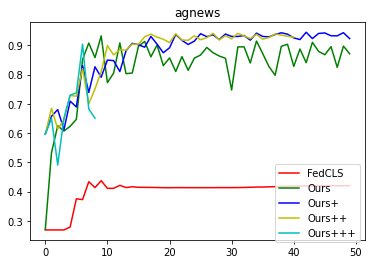

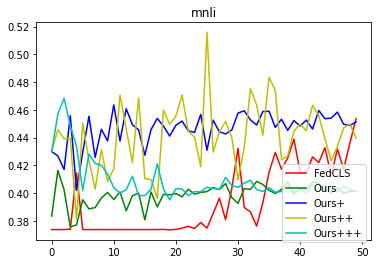

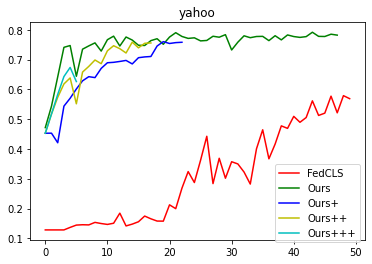

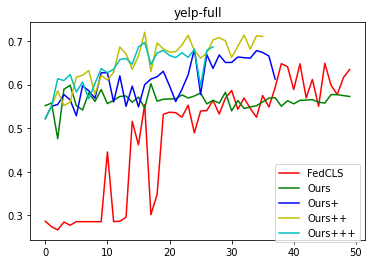

In [31]:
# round to accuracy
# i=0
acc_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
round_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
for dataset in filenames_list:

    log_root_path = os.path.join(root_path,f"{dataset}/all_{all_client_num_in_total_list[dataset]}/seed_{seed}/pattern_{datasets[dataset]}/alpha_{alphas[dataset]}_beta_0_gamma_{gammas[dataset]}")

    filenames = filenames_list[dataset]

    fig = plt.figure()
    plt.title(dataset)
    for filename in filenames:
        log_path = os.path.join(log_root_path,filename)

        iter = 1000
        phrase = 'aggregated model performance is'
        with open(log_path) as f:
            f = f.readlines()
        df = pd.DataFrame(data=None, index = range(iter), columns = range(1))
        for line in f:
            if phrase in line:
                gen = int(re.findall(r'Gen (.+?) ',line)[0])
                
                acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
                df[0][gen]=acc

        df = df.dropna(axis=0, how='any') 

        this_max_acc = np.max(df[0])
        idx = [df[0].to_list().index(x) for x in df[0] if x == this_max_acc][0]
        print(log_path)
        print(f"max accuracy is {this_max_acc}, round is {idx}")
        print(df)
        acc_list[dataset].append(this_max_acc)
        round_list[dataset].append(idx)
        
        iter = min(len(df.index),50)
        y_mean = []
        for j in range(iter):
            y = np.array(df.iloc[j])

            y_mean.append(pd.DataFrame(y).dropna().mean())
            # plt.scatter(j, y)
        print(range(iter))
        print(np.array(y_mean)/full_set_acc[dataset])
        print(colors[filenames.index(filename)])

        plt.plot(range(iter),np.array(y_mean)/full_set_acc[dataset],label=labels[filenames.index(filename)],color=colors[filenames.index(filename)])
    fig.legend(loc="lower right",bbox_to_anchor=(0.9,0.1),bbox_transform=fig.transFigure)
    fig.savefig(os.path.join(output_fig_path, f"{dataset}-roberta-base-round2accuracy.pdf"))

In [32]:
acc_list

{'agnews': [0.4067105263157895,
  0.8673684210526316,
  0.8818421052631579,
  0.8756578947368421,
  0.8409210526315789],
 'mnli': [0.3878509978425027,
  0.35384615384615387,
  0.3939887926642894,
  0.43851248089658684,
  0.39806418746816097],
 'yahoo': [0.49160000000000004,
  0.6174833333333334,
  0.5929166666666666,
  0.59165,
  0.5253666666666666],
 'yelp-full': [0.47353999999999996, 0.42136, 0.47658, 0.50388, 0.48736]}

/Users/cdq/Desktop/opensource/FedPrompt/data/overall-performance/log/agnews/all_100/seed_6/pattern_1/alpha_1_beta_0_gamma_0.001/new_vote_stale_aug_0_conver_0_limit_0_fedclassifier_64_32_roberta-base_5_1_filter_-1.log
max accuracy is 0.4067105263157895, runtime is 640.0
502 50
/Users/cdq/Desktop/opensource/FedPrompt/data/overall-performance/log/agnews/all_100/seed_6/pattern_1/alpha_1_beta_0_gamma_0.001/new_fixed_vote_stale_aug_100_conver_0_limit_0_fedpet_64_32_roberta-base_5_1_filter_-1.log
max accuracy is 0.8673684210526316, runtime is 30150.0
175 50
/Users/cdq/Desktop/opensource/FedPrompt/data/overall-performance/log/agnews/all_100/seed_6/pattern_1/alpha_1_beta_0_gamma_0.001/new_vote_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-base_5_1_filter_0.1.log
max accuracy is 0.8818421052631579, runtime is 36385.5
74 50
/Users/cdq/Desktop/opensource/FedPrompt/data/overall-performance/log/agnews/all_100/seed_6/pattern_1/alpha_1_beta_0_gamma_0.001/new_vote_stale_aug_5_conver_0_limit_0_fedpe

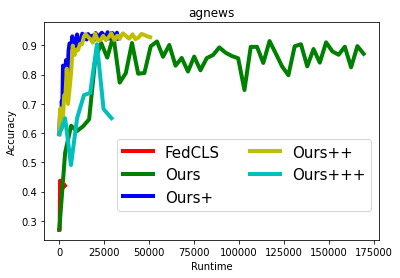

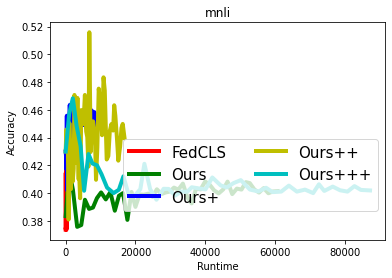

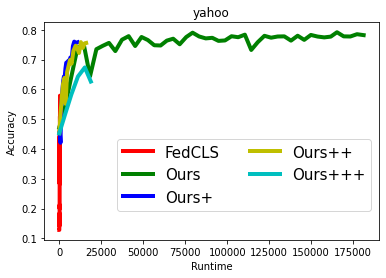

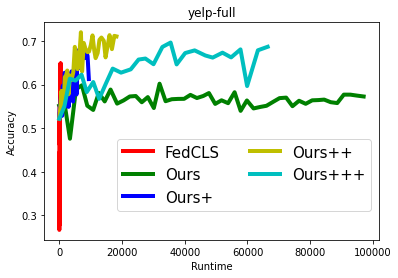

In [33]:
# time to accuracy  
t = 0   
acc_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
runtime_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}     
for dataset in datasets:

    log_root_path = os.path.join(root_path,f"{dataset}/all_{all_client_num_in_total_list[dataset]}/seed_{seed}/pattern_{datasets[dataset]}/alpha_{alphas[dataset]}_beta_0_gamma_{gammas[dataset]}")
    
    fig = plt.figure()
    plt.title(dataset)
    plt.xlabel("Runtime")
    plt.ylabel("Accuracy")
    for filename in filenames:

        log_path = os.path.join(log_root_path, filename)
        if not os.path.exists(log_path):
            print(f"{log_path} not exists")
            continue

        iter = 1000
        phrase = 'train data'
        with open(log_path) as f:
            f = f.readlines()
        df = pd.DataFrame(data=None, index = range(iter), columns = range(1))
        runtime = []
        train_runtime = []
        infer_runtime = []
        time_stamp = 0
        train_time_stamp = 0
        infer_time_stamp = 0

        for line in f:
            if phrase in line:
                line_idx = f.index(line)
                
                train_info = f[line_idx]
                infer_info = f[line_idx + 1]
                
                # TX2: train, 1s/sample, infer, 0.5s/sample, no comm. because bit fit is parameter efficient.
                train_time = sum(list(map(int, re.findall(r'\d+', train_info.split("Gen")[1])))[1:]) * 1 
                infer_time = sum(list(map(int, re.findall(r'\d+', infer_info.split("Gen")[1])))[1:]) * 0.5
                
                time_stamp = time_stamp + train_time + infer_time # elasped time of all clients / energy consumption
                train_time_stamp = train_time + train_time_stamp
                infer_time_stamp = infer_time + infer_time_stamp

                runtime.append(time_stamp)
                train_runtime.append(train_time_stamp)
                infer_runtime.append(infer_time_stamp)
            if 'aggregated model performance is' in line: 
                gen = int(re.findall(r'Gen (.+?) ',line)[0])
                
                acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
                df[0][gen]=acc

        df = df.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列
        if df.empty:
            print(f"Bug: {log_path}")

        this_max_acc = np.max(df[0])
        idx = [df[0].to_list().index(x) for x in df[0] if x == this_max_acc][0]
        print(log_path)
        print(f"max accuracy is {this_max_acc}, runtime is {runtime[idx]}")
        acc_list[dataset].append(this_max_acc)
        runtime_list[dataset].append(runtime[idx])
        # df.to_csv("/Users/cdq/Desktop/opensource/FedPrompt/data/softlabel/agnews_aug_fedpet_128_32_roberta-large.csv")
        iter = min(len(df.index),50)
        y_mean = []
        for j in range(iter):
            y = np.array(df.iloc[j])

            y_mean.append(pd.DataFrame(y).dropna().mean())
            # plt.scatter(j, y)
        print(len(runtime),len(list(map(float, y_mean))))
        plt.plot(runtime[:len(y_mean)],np.array(y_mean)/full_set_acc[dataset],label=labels[filenames.index(filename)],color=colors[filenames.index(filename)],linewidth=4)
    fig.legend(loc="lower right",bbox_to_anchor=(0.9,0.2),bbox_transform=fig.transFigure,ncol=2,fontsize=15)
    fig.savefig(os.path.join(output_fig_path, f"{dataset}-roberta-base-time2accuracy.pdf"))

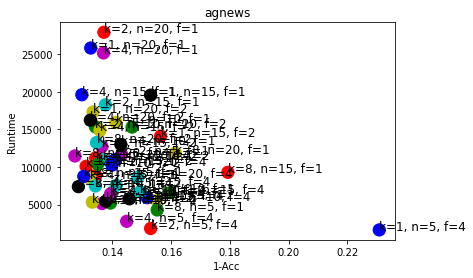

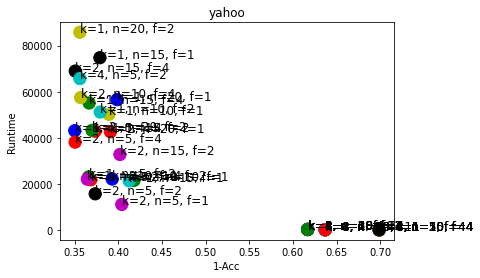

In [28]:
c=0
for dataset in datasets:
    fig = plt.figure()
    plt.title(f"{dataset}")
    plt.xlabel("1-Acc")
    plt.ylabel("Runtime")
    plt.scatter(1- np.array(acc_list[dataset]), np.array(runtime_list[dataset]),s=150,color=colors[:len(acc_list[dataset])])
    for idx in range(len(acc_list[dataset])):
        plt.text(1-acc_list[dataset][idx], runtime_list[dataset][idx], labels[idx], fontsize=12)
    plt.savefig(os.path.join(output_fig_path, f"c{c}.pdf"))
    c=c+1